# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# Membaca dataset dan menampilkan 5 baris pertama
data_source = pd.read_csv('cluster.csv')
data_source.head()

,Unnamed: 0,type,Bathrooms,rooms_available,Electricity,Internet,cluster
0,0,3,0.000,0.230769,1,1,1
1,1,3,0.000,0.230769,1,1,1
2,2,3,0.125,0.000000,1,1,1
3,3,3,0.125,0.384615,1,1,1
4,4,3,0.000,0.307692,1,1,1


In [ ]:
cluster_list = pd.unique(data_source['cluster'].sort_values(ascending=True))

[0 1 2 3]


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
# Pisahkan fitur (X) dan target (y)
X = data_source.drop(columns=['cluster'])
y = data_source['cluster']
 
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3644, 6), y_train=(3644,)
Test set shape: X_test=(911, 6), y_test=(911,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [62]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0.0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0.0),
        'F1-Score': f1_score(y_test, y_pred, average='macro', zero_division=0.0)
    }
    return results
 
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}
 
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
 
# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.698134   0.673865  0.632527  0.649335
1            Decision Tree (DT)  0.998902   0.997951  0.998276  0.998106
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.502744   0.125686  0.250000  0.167275
4              Naive Bayes (NB)  0.998902   0.997951  0.998276  0.998106


Diagram Confusion Matrix.

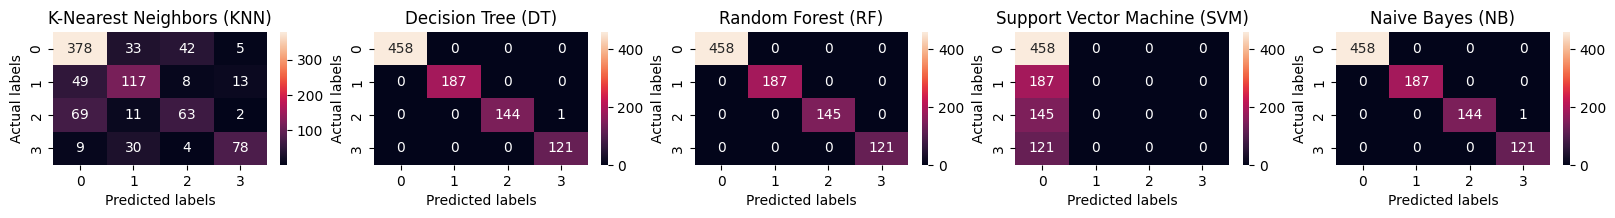

In [55]:
plt.figure(figsize=(20, 10))
for i, model in enumerate(results, 1):
    ax= plt.subplot(len(results), len(results), i)
    sns.heatmap(results[model]['Confusion Matrix'], annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
    ax.set_title(f'{model}'); 
    ax.xaxis.set_ticklabels(cluster_list); ax.yaxis.set_ticklabels(cluster_list)

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

Hasil akurasi, presisi, recall, dan F1 menunjukan bahwa model DT, RF, dan NB menunjukan nilai yang sangat baik. Namun perlu dilakukan kajian lanjutan terutama di model RF yang mendapat penilaian sempurna, untuk menghindari overfitting. KNN menunjukan nilai yang cukup menjanjikan, karenanya akan dicoba untuk di-tuning pada tahap berikutnya. SVM menunjukan kinerja yang sangat buruk, dan semua hasil prediksi dinilai sebagai 1 label.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

In [81]:
train_score = {}
test_score = {}
n_neighbors = np.arange(1, 30, 1)
for neighbor in n_neighbors:
    knn_dummy = KNeighborsClassifier(n_neighbors=neighbor)
    knn_dummy.fit(X_train, y_train)
    train_score[neighbor]=knn_dummy.score(X_train, y_train)
    test_score[neighbor]=knn_dummy.score(X_test, y_test)

Plotting score.

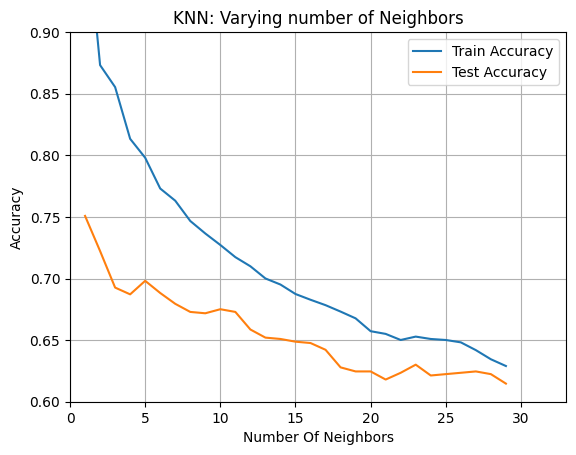

In [82]:
plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

Menurut diagram, akurasi tertinggi didapat saat n_neighbour = 1.

Inisialisasi parameter grid.

In [104]:
param = {'n_neighbors': np.arange(1, 11),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

Grid Search

In [105]:
knn_grid = KNeighborsClassifier()

grid = GridSearchCV(knn_grid, param, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_knn_grid = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],
                                 weights=grid.best_params_['weights'],
                                 algorithm=grid.best_params_['algorithm'],
                                 p=grid.best_params_['p'])
best_knn_grid.fit(X_train, y_train)
y_pred = best_knn_grid.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)
print(best_knn_grid)

Accuracy: 0.8046103183315039
KNeighborsClassifier(algorithm='brute', n_neighbors=np.int64(2), p=1,
                     weights='distance')


dengan Grid Search didapat parameter algorithm brute, n_neighbors 2, p 1, dan weights distance untuk mendapat akurasi tertinggi di 80.46%.

In [108]:
knn_rand = KNeighborsClassifier()

grid = RandomizedSearchCV(knn_rand, param, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_knn_rand = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'],
                                 weights=grid.best_params_['weights'],
                                 algorithm=grid.best_params_['algorithm'],
                                 p=grid.best_params_['p'])
best_knn_rand.fit(X_train, y_train)
y_pred = best_knn_rand.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)
print(best_knn_rand)

Accuracy: 0.8068057080131723
KNeighborsClassifier(algorithm='brute', n_neighbors=np.int64(1), p=1)


dengan Randomizer Search didapat parameter algorirthm brute, n_neighbors 1, dan p 1 untuk mendapat akurasi tertinggi di 80.68%.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

inisialisasi model.

In [109]:
knn_adj_n = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn_adj_grid = KNeighborsClassifier(algorithm='brute', n_neighbors=2, p=1, weights='distance').fit(X_train, y_train)
knn_adj_rand = KNeighborsClassifier(algorithm='brute', n_neighbors=1, p=1).fit(X_train, y_train)

evaluasi model adjustment.

In [110]:
results_adj = {
    'N Neighbour Optimalization': evaluate_model(knn_adj_n, X_test, y_test),
    'Grid Search': evaluate_model(knn_adj_grid, X_test, y_test),
    'Randomizer Search': evaluate_model(knn_adj_rand, X_test, y_test)
}
 
# Buat DataFrame untuk meringkas hasil
summary_df_adj = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# Isi DataFrame dengan hasil
rows_adj = []
for model_name, metrics in results_adj.items():
    rows_adj.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Konversi daftar kamus ke DataFrame
summary_df_adj = pd.DataFrame(rows_adj)
 
# Tampilkan DataFrame
print(summary_df_adj)

                        Model  Accuracy  Precision    Recall  F1-Score
0  N Neighbour Optimalization  0.750823   0.717573  0.708266  0.712111
1                 Grid Search  0.804610   0.787116  0.763593  0.774172
2           Randomizer Search  0.806806   0.788710  0.768219  0.777644


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

evaluasi modek KNN untu sebelum dan setelah optimalisasi.

In [116]:
results_comp = {
    'Sebelum Optimalisasi': evaluate_model(knn, X_test, y_test),
    'Optimalisasi: N Neighbour': evaluate_model(knn_adj_n, X_test, y_test),
    'Optimalisasi: Grid Search': evaluate_model(knn_adj_grid, X_test, y_test),
    'Optimalisasi: Randomizer Search': evaluate_model(knn_adj_rand, X_test, y_test)
}
 
# Buat DataFrame untuk meringkas hasil
summary_df_comp = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# Isi DataFrame dengan hasil
rows_comp = []
for model_name, metrics in results_comp.items():
    rows_comp.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Konversi daftar kamus ke DataFrame
summary_df_comp = pd.DataFrame(rows_comp)
 
# Tampilkan DataFrame
print(summary_df_comp)

                             Model  Accuracy  Precision    Recall  F1-Score
0             Sebelum Optimalisasi  0.698134   0.673865  0.632527  0.649335
1        Optimalisasi: N Neighbour  0.750823   0.717573  0.708266  0.712111
2        Optimalisasi: Grid Search  0.804610   0.787116  0.763593  0.774172
3  Optimalisasi: Randomizer Search  0.806806   0.788710  0.768219  0.777644


Optimalisasi menunjukan peningkatan dari semua aspek, dan optimalisasi terbaik didapat menggunakan Randomizer Search.

memeriksa overfitting.

In [114]:
def evaluate_mse(model, X_test, y_test, X_train, y_train):
    results = {
        'train_mse': mean_squared_error(y_train, model.predict(X_train)),
        'test_mse': mean_squared_error(y_test, model.predict(X_test))
    }
    return results

summary_over = pd.DataFrame(columns=['model', 'train_mse', 'test_mse'])
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_mse(knn, X_test, y_test, X_train, y_train),
    'Decision Tree (DT)': evaluate_mse(dt, X_test, y_test, X_train, y_train),
    'Random Forest (RF)': evaluate_mse(rf, X_test, y_test, X_train, y_train),
    'Support Vector Machine (SVM)': evaluate_mse(svm, X_test, y_test, X_train, y_train),
    'Naive Bayes (NB)': evaluate_mse(nb, X_test, y_test, X_train, y_train),
    'N Neighbour Optimalization': evaluate_mse(knn_adj_n, X_test, y_test, X_train, y_train),
    'Grid Search': evaluate_mse(knn_adj_grid, X_test, y_test, X_train, y_train),
    'Randomizer Search': evaluate_mse(knn_adj_rand, X_test, y_test, X_train, y_train)
}

# Isi DataFrame dengan hasil
rows_mse = []
for model_name, metrics in results.items():
    rows_mse.append({
        'Model': model_name,
        'train_mse': metrics['train_mse'],
        'test_mse': metrics['test_mse']
    })
 
# Konversi daftar kamus ke DataFrame
summary_over = pd.DataFrame(rows_mse)
 
# Menampilkan hasil MSE
print(summary_over)

                          Model  train_mse  test_mse
0     K-Nearest Neighbors (KNN)   0.710209  0.931943
1            Decision Tree (DT)   0.000000  0.001098
2            Random Forest (RF)   0.000000  0.000000
3  Support Vector Machine (SVM)   2.116081  2.037322
4              Naive Bayes (NB)   0.000274  0.001098
5    N Neighbour Optimalization   0.000000  0.818880
6                   Grid Search   0.000000  0.665203
7             Randomizer Search   0.000000  0.656422


Menurut hasil diatas dapat dilihat bahwa Optimalisasi KNN walau dapat meningkatkan akurasi dan F1 Score, namun menyebabkan kesenjangan nilai MSE yang mengindikasikan overfitting. untuk modek Decision Tree, Random Forest, dan Naive Bayes memiliki akurasi dan F1 Score yang tinggi dan kesenjangan nilai MSE yang tidak terlalu signifikan. Model Support Vector Machine memiliki nilai akurasi dan F1 Score yang rendah, dan nilai MSE yang sangat tinggi dimana hal tersebut mengindikasikan underfitting sehingga memerlukan lebih banyak data latih.

Untuk data ini, dapat disimpulkan bahwa model Random Forest adalah model terbaik yang mendapatkan nilai sempurna. Model Decision Tree dan Naive Bayes dapat digunakan sebagai opsi pembanding.